![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [35]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

# **Step 1: Hour of Highest Crime Frequency**
Because our first objective is to discover the hour of highest crime frequency, we first need to create a new variable using our TIME OCC variable that only uses the hour, not minute

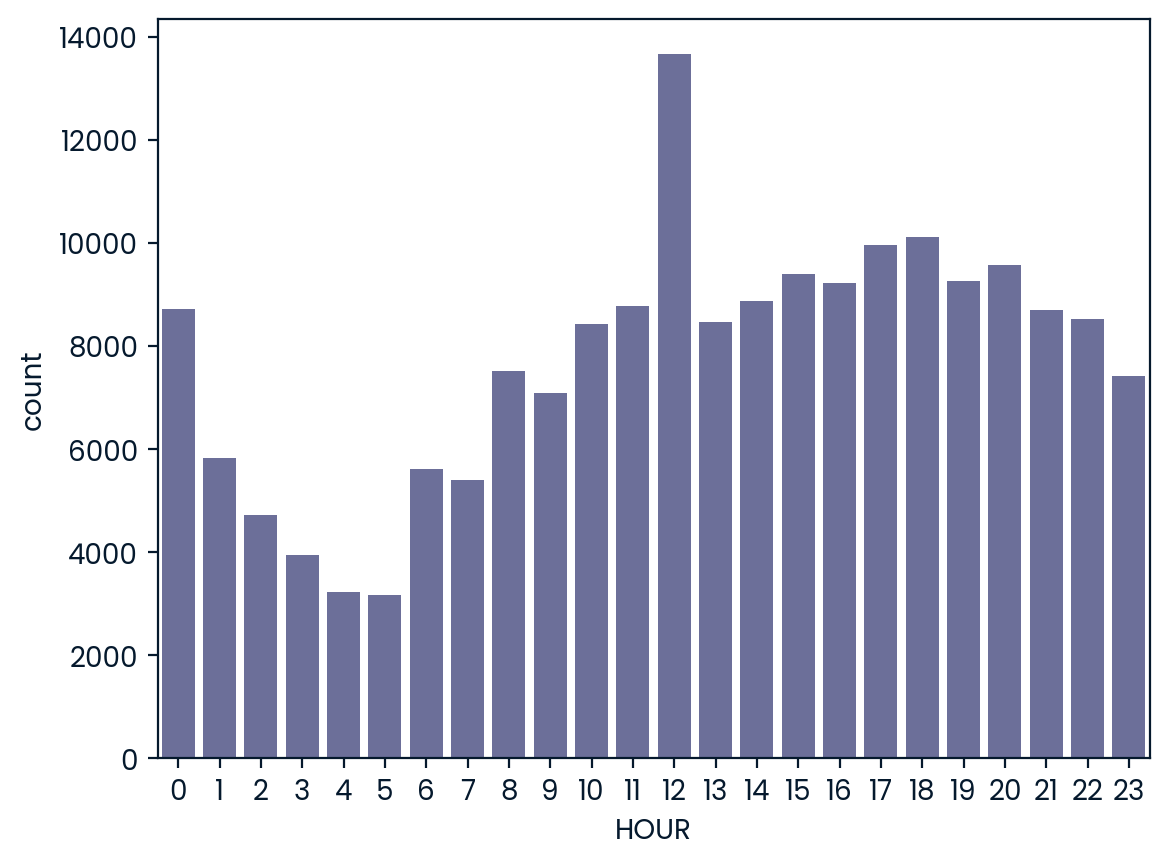

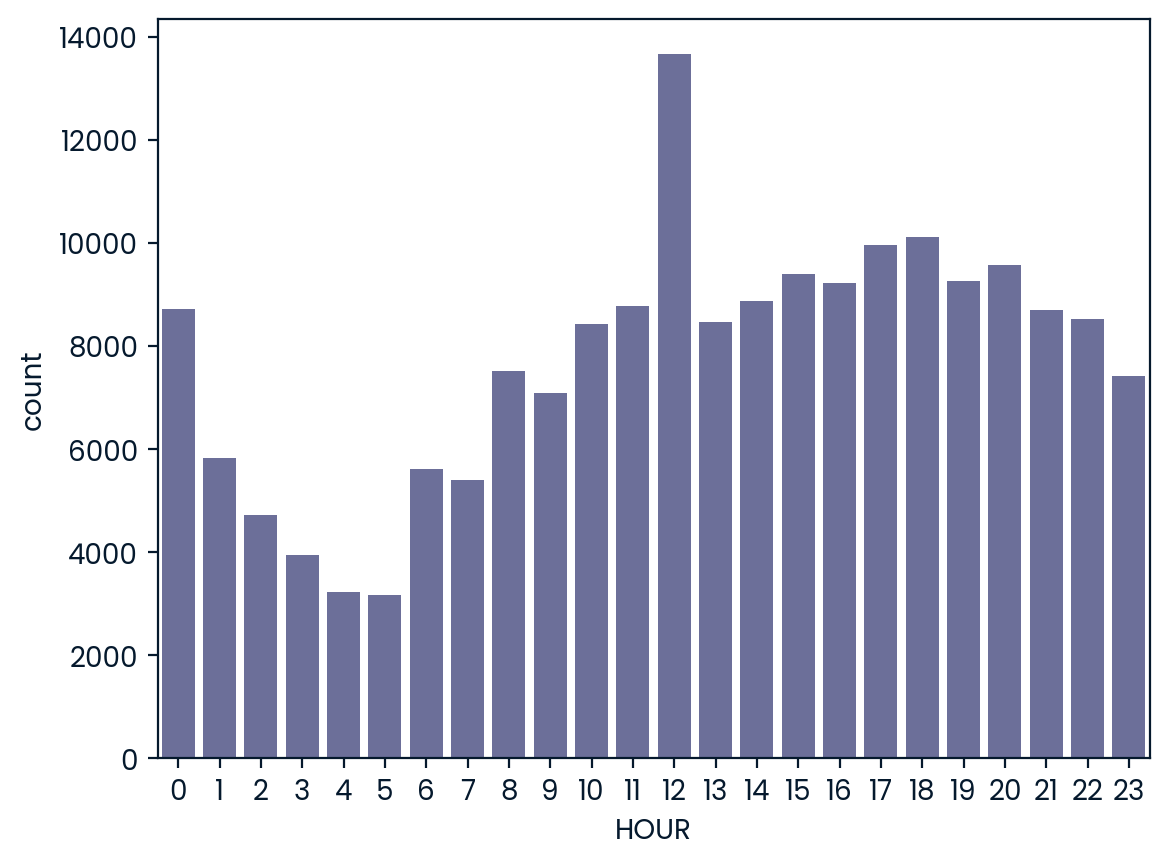

In [36]:
# Adding new df for Hour
crimes["HOUR"] = crimes["TIME OCC"].str[:2].astype(int)

# checking if column is added
#crimes.head()

# Plotting frequency plot
sns.countplot(data=crimes,x= "HOUR")
plt.show(())

In [37]:
# The hour with the highest crime is at 12pm
peak_crime_hour = 12

As shown above, after creating our new variable, we created a data visualization to check the frequenqies of crimes at different hours. The hour with the highest crime is at 12pm, or noon.

# **Step 2: Area with Largest Frequency of Night Crimes**

Our second objective is to find the area with the largest crime frequency at night. We can do this by creating a new dataset consisting only time the crimes occuring from 10pm to 4 am using our new HOUR variable we created.

In [38]:
# Creating dataset w/Crimes between the hours of 10pm and 3:59am
night_crimehrs = crimes[crimes["HOUR"].isin([10,11,12,1,2,3,4])]

# checking dataset
#nightcrimehrs.head()

In [39]:
# getting the frequency/number of crimes per area
area=df2['AREA NAME'].value_counts().to_dict()

#print(area)
l=list(area.values())
mfi=l.index(max(l))

l=list(area.keys())
peak_night_crime_location=l[mfi]
print(area)
print(peak_night_crime_location)

# The area with the largest frequency of night crimes is Central

{'Central': 14944, 'Southwest': 11945, '77th Street': 11739, 'Pacific': 9923, 'Hollywood': 9762, 'Southeast': 9571, 'Olympic': 9414, 'Newton': 9152, 'Van Nuys': 8621, 'N Hollywood': 8502, 'Wilshire': 8482, 'Topanga': 8478, 'Rampart': 8346, 'West Valley': 8102, 'West LA': 7911, 'Northeast': 7628, 'Devonshire': 7411, 'Mission': 6990, 'Harbor': 6618, 'Hollenbeck': 6193, 'Foothill': 5983}
Central


As seen above, we created a list showing the different areas and their corresponding frequencies of night crimes. The area with the highest night crime is Central.

# **Step 3: The Number of Crimes against vistims of diff ages**
Finally, we need to discover the number of crimes against victims of every age grouping. We can do this by first creating a dataset with our victim ages only, then creating a dictionary and looping against every age range to find the number of crimes commited. 

In [40]:
# creating a dataset with only victim ages
A=crimes[['Vict Age']]

dic={}
l=[0,18,26,35,45,55,65]
# creating for loop with 65 as last index to see the number of crimes commited against them 
for i in range(len(l)):
    if l[i]==65:
        o=df[(l[i]<=A['Vict Age'])].shape[0]
        
        s=str(l[i])+"+"
        
        dic[s]=o
        break
    
    k=df[(l[i] <= A['Vict Age']) & (A['Vict Age'] <= (l[i+1]-1))].shape[0]
    
    s=str(l[i])+'-'+str(l[i+1]-1)
    dic[s]=k

victim_ages=pd.Series(dic)
print(victim_ages)

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
dtype: int64


As seen above, we created a dictionary showing the amount of crimes commited against the certain ages.